In [1]:
import sympy
from sympy import *


### **Clase 6: Punto 3**

#### **Punto 3a**

In [2]:
x = Symbol('x')                 # Definimos a t como nuestra variable con la cual haremos las cuentas
[a ,b] = [-1, 1]                # Definimos el intervalo del espacio vectorial

n = abs(int(input("Ingrese el número de monios a corroborar: ")))
mon = []                        # Lista con la base compuesta por los monomios

# Llenamos la lista con los monomios solicitados:
for i in range(n):
    j = Matrix( [x**i] )
    mon.append(j)


# Definimos el producto interno:
def prodint1 (f, g):
    return integrate( f[0] * g[0] , (x, a, b) )

prodintmon = Matrix.zeros(n,n )

# Creamos una matriz de Gram para sintetizar la relación entre las bases propuestas:
for i in range(n):
    for j in range(n):
        prodintmon[ i , j ] = prodint1( mon[i] , mon[j] )
prodintmon

Ingrese el número de monios a corroborar: 7


Matrix([
[  2,   0, 2/3,   0,  2/5,    0,  2/7],
[  0, 2/3,   0, 2/5,    0,  2/7,    0],
[2/3,   0, 2/5,   0,  2/7,    0,  2/9],
[  0, 2/5,   0, 2/7,    0,  2/9,    0],
[2/5,   0, 2/7,   0,  2/9,    0, 2/11],
[  0, 2/7,   0, 2/9,    0, 2/11,    0],
[2/7,   0, 2/9,   0, 2/11,    0, 2/13]])

Entonces, note como por el hecho de que las entradas distintas a la diagonal no sean 0, indica que existen bases que no son ortogonales entre sí

#### **Punto 3b**

In [3]:
# Ahora bien, orotogonalicemos la base dada por el punto anterior. Pero antes, note que el ejercicio nos solicita los primero 10 monomios. Por lo que:

mon10 = []

for i in range(10):
    j = Matrix( [x**i] )
    mon10.append(j)


pollegendre = []                    # La lista donde guardaremos a nuestros polinomios ortogonales (note que no son unitarios)

for v in mon10:
    u = v
    for o in pollegendre:
        u -= (prodint1 (o, v) / prodint1(o, o)) * o
    pollegendre.append(u)

FiniteSet(*pollegendre)

{Matrix([[1]]), Matrix([[x]]), Matrix([[x**2 - 1/3]]), Matrix([[x**3 - 3*x/5]]), Matrix([[x**4 - 6*x**2/7 + 3/35]]), Matrix([[x**5 - 10*x**3/9 + 5*x/21]]), Matrix([[x**6 - 15*x**4/11 + 5*x**2/11 - 5/231]]), Matrix([[x**7 - 21*x**5/13 + 105*x**3/143 - 35*x/429]]), Matrix([[x**8 - 28*x**6/15 + 14*x**4/13 - 28*x**2/143 + 7/1287]]), Matrix([[x**9 - 36*x**7/17 + 126*x**5/85 - 84*x**3/221 + 63*x/2431]])}

In [4]:
# Matriz de gram para verificarlo:
gramlegendre = Matrix.zeros( 10 , 10 )

for i in range(10):
    for j in range(10):
        gramlegendre[ i , j ] = prodint1( pollegendre[i] , pollegendre[j] )

gramlegendre

Matrix([
[2,   0,    0,     0,         0,         0,          0,           0,               0,                0],
[0, 2/3,    0,     0,         0,         0,          0,           0,               0,                0],
[0,   0, 8/45,     0,         0,         0,          0,           0,               0,                0],
[0,   0,    0, 8/175,         0,         0,          0,           0,               0,                0],
[0,   0,    0,     0, 128/11025,         0,          0,           0,               0,                0],
[0,   0,    0,     0,         0, 128/43659,          0,           0,               0,                0],
[0,   0,    0,     0,         0,         0, 512/693693,           0,               0,                0],
[0,   0,    0,     0,         0,         0,          0, 512/2760615,               0,                0],
[0,   0,    0,     0,         0,         0,          0,           0, 32768/703956825,                0],
[0,   0,    0,     0,         0,         0,   

#### **Punto 3c**

In [7]:
# Para este punto c, modificamos la definición de producto interno, tal que:
def prodint2 ( f, g ):
    return integrate( f[0] * g[0] * sqrt(1 - x**2) , (x, a, b) )

# Para ortogonalizar la base, seguimos el mismo proceso del punto anterior: (tomaremos la misma lista mon10 con los primeros 10 monomios)


polchebyshev = []                    # La lista donde guardaremos a nuestros polinomios ortogonales

for v in mon10:
    u = v
    for o in polchebyshev:
        u -= (prodint2 (o, v) / prodint2(o, o)) * o
    polchebyshev.append(u)

KeyboardInterrupt: 

In [6]:
init_printing()
polchebyshev

⎡                              ⎡        2     ⎤                   ⎡        4   ↪
⎢          ⎡ 2   1⎤  ⎡ 3   x⎤  ⎢ 4   3⋅x    1 ⎥  ⎡ 5    3   3⋅x⎤  ⎢ 6   5⋅x    ↪
⎢[1], [x], ⎢x  - ─⎥, ⎢x  - ─⎥, ⎢x  - ──── + ──⎥, ⎢x  - x  + ───⎥, ⎢x  - ──── + ↪
⎣          ⎣     4⎦  ⎣     2⎦  ⎣      4     16⎦  ⎣          16 ⎦  ⎣      4     ↪

↪     2     ⎤⎤
↪  3⋅x    1 ⎥⎥
↪  ──── - ──⎥⎥
↪   8     64⎦⎦

#### **Punto 3d**

##### I: Expansión en la base de monomios y en la de Legendre

In [9]:
# Prueba:
h = Matrix( [ sin(3*x) * (1 - x**2) ] )

n = abs(int(input( "Ingrese el máximo grado de la aproximación que desea realizar: " )))

# Para este apartado, por convenenecia expanderemos en la base de Legendre usando la propia opción de sympy, dado que las normas son más manejables que as
# ortogonalizadas manualmente

legendre_base = [Matrix([legendre( m , x )]) for m in range(n) ]

# Ahora bien, vamos a calcular los coeficientes que así aproximan a nuestra función. Para ello, partimos del hecho de que los polinomios de Legendre son ortogonales
# por lo que para encontrar los coeficientes nos basta con hacer producto punto entre h y cada una de las bases.

def coefs(v):                                         # Para facilitar el gráfico más adelante, definiremos una función que nos devuelva una matriz con los coeficientes
  coef = []                                           # dependiendo del número de bases sobre las que se desee hacer la aproximación
  for i in range(v):
    ci = ( prodint1( h , legendre_base[i] ) / prodint1( legendre_base[i] , legendre_base [i] ) )
    coef.append(ci)
  return coef


print("Los coeficientes de la aprox son:")
init_printing()
coefs(n)

Ingrese el máximo grado de la aproximación que desea realizar: 8
Los coeficientes de la aprox son:


⎡     4⋅sin(3)   2⋅cos(3)     154⋅cos(3)   1568⋅sin(3)       26114⋅sin(3)   12 ↪
⎢0, - ──────── - ────────, 0, ────────── + ───────────, 0, - ──────────── - ── ↪
⎣        9          3             81           243               243           ↪

↪ 76⋅cos(3)     4400⋅cos(3)   92590⋅sin(3)⎤
↪ ─────────, 0, ─────────── + ────────────⎥
↪   81               9             27     ⎦

In [10]:
# Entonces, nuestra función aproximada es (en función de la cantidad de términos a aproximar):
def h_func_aprox(v):
  h_aprox = Matrix.zeros(1, 1)
  local_coef = coefs(v)                 # Asignamos a la función de coeficientes una variable para que el bucle funcione correctamente
  for i in range(v):
      h_aprox = h_aprox + ( local_coef[i] * legendre_base[i] )
  return h_aprox[0]
h_func_aprox(n)

                            ⎛   3      ⎞                                       ↪
  ⎛  4⋅sin(3)   2⋅cos(3)⎞   ⎜5⋅x    3⋅x⎟ ⎛154⋅cos(3)   1568⋅sin(3)⎞   ⎛  26114 ↪
x⋅⎜- ──────── - ────────⎟ + ⎜──── - ───⎟⋅⎜────────── + ───────────⎟ + ⎜- ───── ↪
  ⎝     9          3    ⎠   ⎝ 2      2 ⎠ ⎝    81           243    ⎠   ⎝      2 ↪

↪                        ⎛    5       3       ⎞                                ↪
↪ ⋅sin(3)   1276⋅cos(3)⎞ ⎜63⋅x    35⋅x    15⋅x⎟   ⎛4400⋅cos(3)   92590⋅sin(3)⎞ ↪
↪ ─────── - ───────────⎟⋅⎜───── - ───── + ────⎟ + ⎜─────────── + ────────────⎟ ↪
↪ 43            81     ⎠ ⎝  8       4      8  ⎠   ⎝     9             27     ⎠ ↪

↪  ⎛     7        5        3       ⎞
↪  ⎜429⋅x    693⋅x    315⋅x    35⋅x⎟
↪ ⋅⎜────── - ────── + ────── - ────⎟
↪  ⎝  16       16       16      16 ⎠

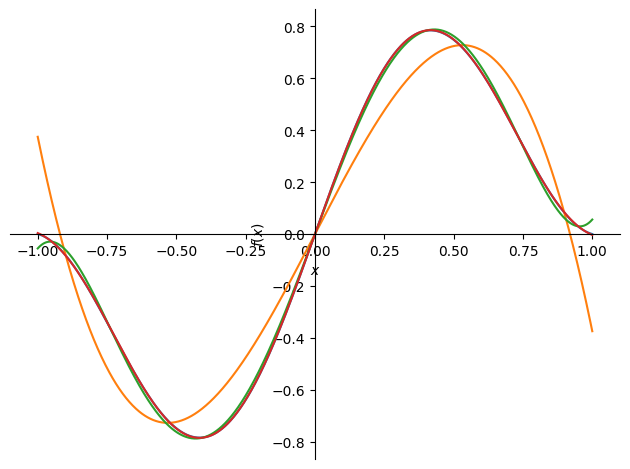

In [17]:
h_stack = [ h[0], h_func_aprox(4), h_func_aprox(6), h_func_aprox(8)]
plot(*h_stack, (x, -1, 1))

In [ ]:
# Intento de matplot
"""
import numpy as np
import matplotlib.pyplot as plt

x_array = np.linspace(a, b, 100)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.set_title('zeroed spines')

h_func = h[0]

# Evaluate the symbolic expression h_func for each numerical value in x_array
h_vals = [h_func.subs(x, val) for val in x_array]

ax.plot(x_array, h_vals, label='h(x)', color="black", linewidth=2) # Use the numerical y-values for plotting
ax.plot(x_array, h_func_aprox(4), label='h(x)', color="blue", linewidth=2, linestyle='-')

ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['top'].set_color('none')
plt.grid(True, linestyle='-', alpha=0.25)
plt.legend()
plt.show()
"""

##### II. Expansión en la base de Chebyshev

In [23]:
# De forma análoga al proceso con los polinomios de Legendre:
h = Matrix( [ sin(3*x) * (1 - x**2) ] )

n = abs(int(input( "Ingrese el máximo grado de la aproximación que desea realizar: " )))

chebyshev_base = [Matrix([chebyshevu( m , x )]) for m in range(n) ]     # El chebyshevu es para generar a los polinomios de Chebyshev de segunda especie

# Ahora bien, vamos a calcular los coeficientes que así aproximan a nuestra función. Para ello, partimos del hecho de que los polinomios de Legendre son ortogonales
# por lo que para encontrar los coeficientes nos basta con hacer producto punto entre h y cada una de las bases.

def coefs_cheb(v):                                         # Para facilitar el gráfico más adelante, definiremos una función que nos devuelva una matriz con los coeficientes
  coef = []                                           # dependiendo del número de bases sobre las que se desee hacer la aproximación
  for i in range(v):
    ci = ( prodint2( h , chebyshev_base[i] ) / prodint2( chebyshev_base[i] , chebyshev_base [i] ) )
    coef.append(ci)
  return coef

Ingrese el máximo grado de la aproximación que desea realizar: 6


In [22]:
print("Los coeficientes de la aprox son:")
init_printing()
coefs_cheb(n)

Los coeficientes de la aprox son:


KeyboardInterrupt: 

In [24]:
# Ahora el polinomio:
def h_chebyshev_pol(v):
  coeficientes = coefs_cheb(v)
  h_cheb_aprox = Matrix.zeros(1,1)
  for i in coeficientes:
    h_cheb_aprox = h_cheb_aprox + coeficientes[i] * chebyshev_base[i]
  return h_cheb_aprox

# Ahora, se supone que el h_cheb_aprox nos devuelve una aproximación de n términos